### Assignment 1

Submission should be in a Jupyter note book (.ipynb)

1. Implement a function that converts a ```fixed<w, b>``` representation to a real number. Use two's compement for negative numbers. The function signature is 

   ```python
   def fromFixedPoint(w: int, b:int, bits:[int]) -> float:
   # w: width of the binary representation
   # b: binary point
   ```
   Test the following inputs
   ```python
   fromFixedPoint(10, 3, [0, 1, 0, 1, 1, 0, 0, 1, 1, 0])
   ```
   ```python
   fromFixedPoint(10, 5, [1, 0, 0, 1, 0, 1, 0, 1, 1, 1])
   ```
   ```python
   fromFixedPoint(8, 2, [1, 0, 1, 0, 1, 0, 1, 1])
   ```
   


In [1]:
def fromFixedPoint(w: int, b:int, bits:[int]) -> float:
    # Check if each bit is either 0 or 1
    for bit in bits:
        if bit not in [0, 1]:
            raise ValueError("All elements in 'bits' must be either 0 or 1.")

    # Check if the length of 'bits' matches 'w'
    if w != len(bits):
        raise ValueError("The length of 'bits' must be equal to 'w'.")
            
    # Check if the number is negative
    is_negative = bits[0] == 1

    # Convert the binary array back to a decimal number
    x = 0
    for i in range(1, w):
        x += bits[i] * (2 ** (w - 1 - i - b))

    # Adjust for negative numbers
    if is_negative:
        x -= 2 ** (w - 1 - b)

    return x

In [2]:
fromFixedPoint(10, 3, [0, 1, 0, 1, 1, 0, 0, 1, 1, 0])

44.75

In [3]:
fromFixedPoint(10, 5, [1, 0, 0, 1, 0, 1, 0, 1, 1, 1])

-13.28125

In [4]:
fromFixedPoint(8, 2, [1, 0, 1, 0, 1, 0, 1, 1])

-21.25

2. Calculate the price of the following questions step by step using two step Cox Rox Rubinstein (CRR) Binomial tree

    a. European call option with $S = 100$, $K = 105$, $r = 3\%$, $T=1$, $\sigma = 20\%$
    
    b. European put option with $S = 100$, $K = 105$, $r = 3\%$, $T=1$, $\sigma = 20\%$
    
    c. European call option with $S = 100$, $K = 105$, $r = 3\%$, $T=1$, $\sigma = 10\%$
    
    d. European put option with $S = 100$, $K = 105$, $r = 3\%$, $T=1$, $\sigma = 10\%$
    
    What is the value of the portfolio that is long (a) and short (b)? How about the portfolio that long (c) and short (d)?
    

For a:
\begin{align*}
t &= \frac{1}{2} \\
b &= e^{vol^2 \cdot t + r \cdot t} + e^{-r \cdot t} = e^{0.2^2 \cdot \frac{1}{2}+0.03 \cdot \frac{1}{2}} + e^{-0.03 \cdot \frac{1}{2}} = 2.0207 \\
U &= \frac{b + \sqrt{b^2-4}}{2} = \frac{2.0207+\sqrt{2.0207^2-4}}{2} = 1.1547 \\
P &= \frac{e^{r \cdot t} - 1}{U} = \frac{e^{0.03 \cdot \frac{1}{2}} - 1}{1.1547} = 0.5164 \\
S_u &= 100 \times 1.1547 = 115.47 \\
S_d &= 100 \times \frac{1}{1.1547} = 86.60 \\
C_u &= \max(115.47-105, 0) = 10.47 \\
C_d &= \max(86.60-105, 0) = 0 \\
C_{0.5} &= e^{-r \cdot t} \times (P \times C_u + (1-P) \times C_d) \\
&= e^{-0.03 \cdot \frac{1}{2}} \times (0.5164 \times 10.47 + 0) = 5.326 \\
S_{uu} &= 100 \times 1.1547^2 = 133.333 \\
S_{ud} &= 100 \times 1.1547 \times \frac{1}{1.1547} = 100 \\
S_{dd} &= 100 \times \frac{1}{1.1547^2} = 75 \\
C_{uu} &= \max(133.33 - 105, 0) = 28.33 \\
C_{ud} &= \max(100 - 105, 0) = 0 \\
C_{dd} &= \max(75 - 105, 0) = 0 \\
C_1 &= e^{-r \cdot t} \times (P^2 \times C_{uu} + (1-P)^2 \times C_{dd} + 2P(1-P) \times C_{ud}) \\
&= e^{-0.03 \cdot 1} \times (0.5164^2 \times 28.33 + 0 + 0) = 7.33 \\
\end{align*}

For b:
\begin{align*}
t &= \frac{1}{2} \\
b &= e^{vol^2 \cdot t + r \cdot t} + e^{-r \cdot t} = e^{0.2^2 \cdot \frac{1}{2}+0.03 \cdot \frac{1}{2}} + e^{-0.03 \cdot \frac{1}{2}} = 2.0207 \\
U &= \frac{b + \sqrt{b^2-4}}{2} = \frac{2.0207+\sqrt{2.0207^2-4}}{2} = 1.1547 \\
P &= \frac{e^{r \cdot t} - 1}{U} = \frac{e^{0.03 \cdot \frac{1}{2}} - 1}{1.1547} = 0.5164 \\
S_u &= 100 \times 1.1547 = 115.47 \\
S_d &= 100 \times \frac{1}{1.1547} = 86.60 \\
P_u &= \max(105 - 115.47, 0) = 0 \\
P_d &= \max(105 - 86.6, 0) = 18.4 \\
P_{0.5} &= e^{-r \cdot t} \times (P \times P_u + (1-P) \times P_d) \\
&= e^{-0.03 \cdot \frac{1}{2}} \times (0 + (1-0.5164) \times 18.4) = 8.766 \\
S_{uu} &= 100 \times 1.1547^2 = 133.333 \\
S_{ud} &= 100 \times 1.1547 \times \frac{1}{1.1547} = 100 \\
S_{dd} &= 100 \times \frac{1}{1.1547^2} = 75 \\
P_{uu} &= \max(105 - 133.33, 0) = 0 \\
P_{ud} &= \max(105 - 100, 0) = 5 \\
P_{dd} &= \max(105 - 75, 0) = 30 \\
P_1 &= e^{-r \cdot t} \times (P^2 \times P_{uu} + (1-P)^2 \times P_{dd} + 2P(1-P) \times P_{ud}) \\
&= e^{-0.03 \cdot 1} \times (0 + (1-0.5164)^2 \times 30 + 2(0.5164)(1-0.5164)(5)) = 9.23 \\
\end{align*}

What is the value of the portfolio that is long (a) and short (b)\
7.33 - 9.23 = -1.9

For c:

\begin{align*}
t &= \frac{1}{2} \\
b &= e^{vol^2 \cdot t + r \cdot t} + e^{-r \cdot t} = e^{0.1^2 \cdot \frac{1}{2}+0.03 \cdot \frac{1}{2}} + e^{-0.03 \cdot \frac{1}{2}} = 2.0053 \\
U &= \frac{b + \sqrt{b^2-4}}{2} = \frac{2.0053 + \sqrt{2.0053^2-4}}{2} = 1.0756 \\
P &= \frac{e^{0.03 \cdot t} - 1}{U} = \frac{e^{0.03 \cdot \frac{1}{2}} - 1}{1.0756} = 0.5854 \\
S_u &= 100 \times 1.0756 = 107.56 \\
S_d &= 100 \times \frac{1}{1.0756} = 92.97 \\
C_u &= \max(107.56 - 105, 0) = 2.56 \\
C_d &= \max(92.97 - 105, 0) = 0 \\
C_{0.5} &= e^{-0.03 \cdot t} \times (P \times C_u + (1-P) \times C_d) \\
&= e^{-0.03 \cdot \frac{1}{2}} \times (0.5854 \times 2.56 + 0) = 1.476 \\
S_{uu} &= 100 \times 1.0756^2 = 115.69 \\
S_{ud} &= 100 \times 1.0756 \times \frac{1}{1.0756} = 100 \\
S_{dd} &= 100 \times \frac{1}{1.0756^2} = 86.47 \\
C_{uu} &= \max(115.69 - 105, 0) = 10.69 \\
C_{ud} &= \max(100 - 105, 0) = 0 \\
C_{dd} &= \max(86.47 - 105, 0) = 0 \\
C_1 &= e^{-0.03 \cdot t} \times (P^2 \times C_{uu} + (1-P)^2 \times C_{dd} + 2P(1-P) \times C_{ud}) \\
&= e^{-0.03 \cdot 1} \times (0.5854^2 \times 10.69 + 0 + 0) = 3.55 \\
\end{align*}

For d:
\begin{align*}
t &= \frac{1}{2} \\
b &= e^{vol^2 \cdot t + r \cdot t} + e^{-r \cdot t} = e^{0.1^2 \cdot \frac{1}{2}+0.03 \cdot \frac{1}{2}} + e^{-0.03 \cdot \frac{1}{2}} = 2.0053 \\
U &= \frac{b + \sqrt{b^2-4}}{2} = \frac{2.0053 + \sqrt{2.0053^2-4}}{2} = 1.0756 \\
P &= \frac{e^{0.03 \cdot t} - 1}{U} = \frac{e^{0.03 \cdot \frac{1}{2}} - 1}{1.0756} = 0.5854 \\
S_u &= 100 \times 1.0756 = 107.56 \\
S_d &= 100 \times \frac{1}{1.0756} = 92.97 \\
P_u &= \max(105 - 107.56, 0) = 0 \\
P_d &= \max(105 - 92.97, 0) = 12.03 \\
P_{0.5} &= e^{-r \cdot t} \times (P \times P_u + (1-P) \times P_d) \\
&= e^{-0.03 \cdot \frac{1}{2}} \times (0 + (1-0.5854) \times 12.03) = 4.9133 \\
S_{uu} &= 100 \times 1.0756^2 = 115.69 \\
S_{ud} &= 100 \times 1.0756 \times \frac{1}{1.0756} = 100 \\
S_{dd} &= 100 \times \frac{1}{1.0756^2} = 86.47 \\
P_{uu} &= \max(105 - 115.69, 0) = 0 \\
P_{ud} &= \max(105 - 100, 0) = 5 \\
P_{dd} &= \max(105 - 86.47, 0) = 18.53 \\
P_1 &= e^{-r \cdot t} \times (P^2 \times P_{uu} + (1-P)^2 \times P_{dd} + 2P(1-P) \times P_{ud}) \\
&= e^{-0.03 \cdot 1} \times (0 + (1-0.5854)^2 \times 18.53 + 2(0.5854)(1-0.5854)(5)) = 5.45 \\
\end{align*}

How about the portfolio that long (c) and short (d)?\
3.55 - 5.45 = -1.9

3. Greeks measure the sensitivity of the price of derivatives to a change in underlying asset’s parameters. They are used for hedging and risk
management. The commonly used greeks are:
    * Delta $\Delta = \frac{\partial V}{\partial S}$: measures the rate of change of the option value with respect to changes in the underlying asset's price.
    * Gamma $\Gamma = \frac{\partial^2 V}{\partial S^2} = \frac{\partial \Delta}{\partial S}$: measures the rate of change of delta with respect to changes in the underlying asset's price.
    * Vega: $v = \frac{\partial V}{\partial \sigma}$: measures the rate of change of the option value with respect to changes in the underlying asset's volatility.
    * Theta: $\theta = \frac{\partial V}{\partial t}$: the rate of change in the price of an option with respect to pricing time. Note that we normally use $t$ to represent pricing time, $T$ to represent expiry time, time to expiry in our pricer is $T-t$. In the implementation of the pricers that take time to expiry as an argument, we implicitly set pricing time to 0 (present).
    * Rho: the rate of change in the price of an option in response to a change in the interest rate.
    
  The greeks are normally not known in closed form since numerical pricers are used. They are approximated by finite differences:

  \begin{align}
    & \Delta = \frac{\partial V}{\partial S} \approx \frac{V(S + \Delta S) - V(S-\Delta S)}{2 \Delta S}, ~~~\Delta S = 0.1\% S \\
    & \Gamma = \frac{\partial V^2}{\partial S^2} \approx \frac{V(S + \Delta S) - 2V(S) + V(S-\Delta S)}{\Delta S^2} \\
    & v = \frac{\partial V}{\partial \sigma} \approx \frac{V(S, \sigma +\Delta \sigma) - V(S, \sigma -\Delta \sigma)}{2 \Delta \sigma } ~~~~~~~\Delta \sigma = 0.1\% \\
    & \theta = \frac{\partial V}{\partial t} \approx \frac{V(S, t+\Delta t, T) - V(S, t, T)}{\Delta t} ~~~~\Delta t = 0.004 \\
    & \rho = \frac{\partial V}{\partial r} \approx \frac{V(S, r+\Delta r) - V(S, r - \Delta r)}{2 \Delta r}  ~~~~~\Delta r = 0.0001
  \end{align}

  Implement a Greeks calculater for binomial tree pricer provided below. The signature of the greeks calculator is
      ```python
      def binomialGreeks(S, r, vol, T, strike, greekType) -> float
      ```
  Setting $S = 100, r = 0.03, vol = 0.2$, plot each greeks as a function of strike for 1 year European call option with strike from 50 to 150. Play with different binomial models and see if there is any difference.
  
  Note that in practice, the greeks are rescaled with a pre-defined scaler, so that they give a sense of how much PV (Delta) changes with a typical move of the market. The rescaling is not incorporated in this exercise.

In [5]:
# binomial pricer for exercise 3
import math
from enum import Enum
import matplotlib.pyplot as plt

class PayoffType(Enum):
    Call = 0
    Put = 1
    
class EuropeanOption():
    def __init__(self, expiry, strike, payoffType):
        self.expiry = expiry
        self.strike = strike
        self.payoffType = payoffType
    def payoff(self, S):
        if self.payoffType == PayoffType.Call:
            return max(S - self.strike, 0)
        elif self.payoffType == PayoffType.Put:
            return max(self.strike - S, 0)
        else:
            raise Exception("payoffType not supported: ", self.payoffType)
    def valueAtNode(self, t, S, continuation):
        return continuation

class AmericanOption():
    def __init__(self, expiry, strike, payoffType):
        self.expiry = expiry
        self.strike = strike
        self.payoffType = payoffType
    def payoff(self, S):
        if self.payoffType == PayoffType.Call:
            return max(S - self.strike, 0)
        elif self.payoffType == PayoffType.Put:
            return max(self.strike - S, 0)
        else:
            raise Exception("payoffType not supported: ", self.payoffType)
    def valueAtNode(self, t, S, continuation):
        return max(self.payoff(S), continuation)

def crrCalib(r, vol, t):
    b = math.exp(vol * vol * t + r * t) + math.exp(-r * t)
    u = (b + math.sqrt(b * b - 4)) / 2
    p = (math.exp(r * t) - (1 / u)) / (u - 1 / u)
    return (u, 1/u, p)

def jrrnCalib(r, vol, t):
    u = math.exp((r - vol * vol / 2) * t + vol * math.sqrt(t))
    d = math.exp((r - vol * vol / 2) * t - vol * math.sqrt(t))
    p = (math.exp(r * t) - d) / (u - d)
    return (u, d, p)

def jreqCalib(r, vol, t):
    u = math.exp((r - vol * vol / 2) * t + vol * math.sqrt(t))
    d = math.exp((r - vol * vol / 2) * t - vol * math.sqrt(t))
    return (u, d, 1/2)

def tianCalib(r, vol, t):
    v = math.exp(vol * vol * t)
    u = 0.5 * math.exp(r * t) * v * (v + 1 + math.sqrt(v*v + 2*v - 3))
    d = 0.5 * math.exp(r * t) * v * (v + 1 - math.sqrt(v*v + 2*v - 3))
    p = (math.exp(r * t) - d) / (u - d)
    return (u, d, p)

def binomialPricer(S, r, vol, trade, n, calib):
    t = trade.expiry / n
    (u, d, p) = calib(r, vol, t)
    # set up the last time slice, there are n+1 nodes at the last time slice
    vs = [trade.payoff(S * u ** (n - i) * d ** i) for i in range(n + 1)]
    # iterate backward
    for i in range(n - 1, -1, -1):
        # calculate the value of each node at time slide i, there are i nodes
        for j in range(i + 1):
            nodeS = S * u ** (i - j) * d ** j
            continuation = math.exp(-r * t) * (vs[j] * p + vs[j + 1] * (1 - p))
            vs[j] = trade.valueAtNode(t * i, nodeS, continuation)
    return vs[0]

In [6]:
def binomialGreeks(S, r, vol, T, k, greek) -> float:
    
    trade = optiontype(T, strike, payoffType)
    delta_S = 0.001 * S
    delta_sigma = 0.001
    delta_t = 0.004
    delta_r = 0.0001

    base_price = binomialPricer(S, r, vol, trade, n, calib)
    
    if greek == 'Delta':
        price_up = binomialPricer(S + delta_S, r, vol, trade, n, calib)
        price_down = binomialPricer(S - delta_S, r, vol, trade, n, calib)
        delta = (price_up - price_down) / (2 * delta_S)
        return delta

    elif greek == 'Gamma':
        price_up = binomialPricer(S + delta_S, r, vol, trade, n, calib)
        price_down = binomialPricer(S - delta_S, r, vol, trade, n, calib)
        gamma = (price_up - 2 * base_price + price_down) / (delta_S ** 2)
        return gamma

    elif greek == 'Vega':
        price_up = binomialPricer(S, r, vol + delta_sigma, trade, n, calib)
        price_down = binomialPricer(S, r, vol - delta_sigma, trade, n, calib)
        vega = (price_up - price_down) / (2 * delta_sigma)
        return vega

    elif greek == 'Theta':
        trade_t = optiontype(T+delta_t, strike, payoffType)
        price_up = binomialPricer(S, r, vol, trade_t, n, calib)
        price_down = binomialPricer(S, r, vol, trade, n, calib)
        theta = (price_up - price_down) / delta_t
        return theta

    elif greek == 'Rho':
        price_up = binomialPricer(S, r + delta_r, vol, trade, n, calib)
        price_down = binomialPricer(S, r - delta_r, vol, trade, n, calib)
        rho = (price_up - price_down) / (2 * delta_r)
        return rho

    else:
        raise ValueError("Unknown Greek: " + greek)

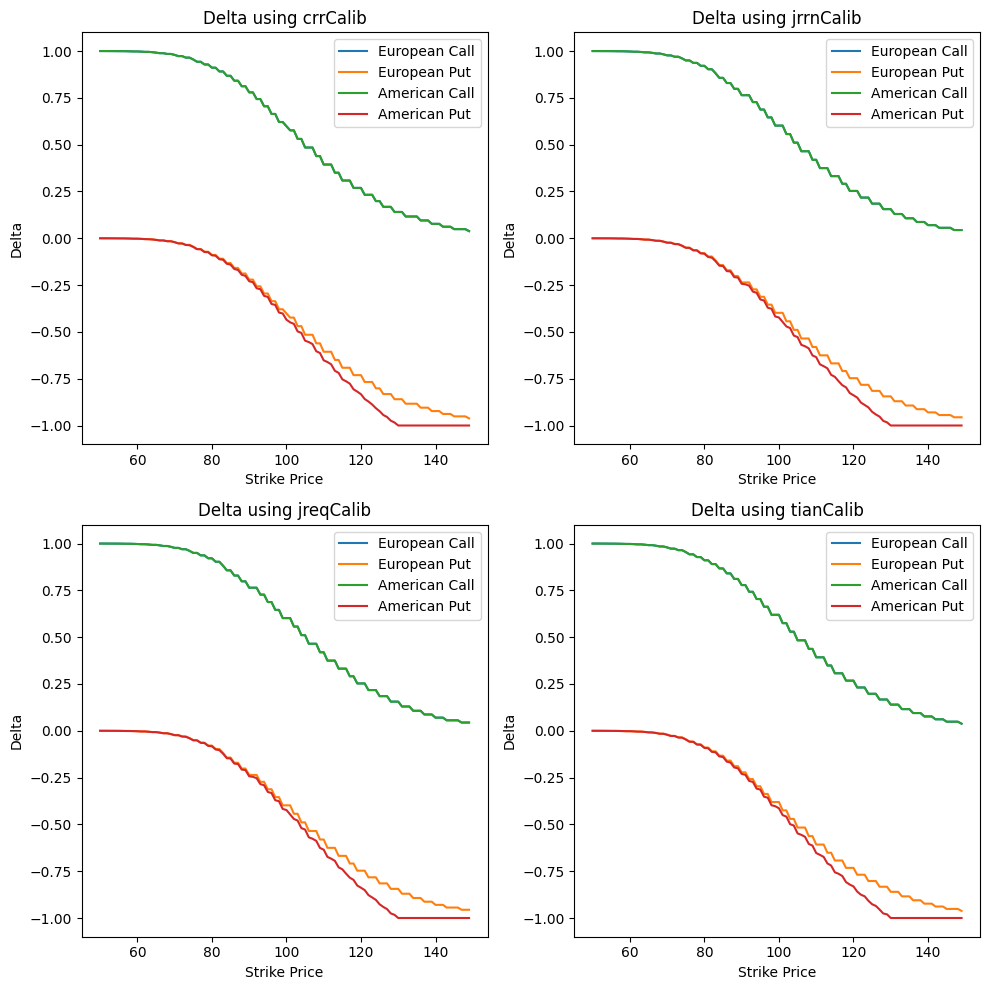

In [7]:
# Define parameters
S = 100
r = 0.03
vol = 0.2
ks = range(50, 150)
T = 1
n = 300

# Define calibration methods
calib_methods = [crrCalib, jrrnCalib, jreqCalib, tianCalib]
calib_names = ["crrCalib", "jrrnCalib", "jreqCalib", "tianCalib"]

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Loop over each calibration method
for i, calib in enumerate(calib_methods):
    # Reset for each calibration
    european_call = []
    european_put = []
    american_call = []
    american_put = []

    # Compute deltas
    for strike in ks:
        payoffType = PayoffType.Call
        optiontype = EuropeanOption
        european_call.append(binomialGreeks(S, r, vol, T, float(strike), "Delta"))
        payoffType = PayoffType.Put
        optiontype = EuropeanOption
        european_put.append(binomialGreeks(S, r, vol, T, float(strike), "Delta"))
        payoffType = PayoffType.Call
        optiontype = AmericanOption
        american_call.append(binomialGreeks(S, r, vol, T, float(strike), "Delta"))
        payoffType = PayoffType.Put
        optiontype = AmericanOption
        american_put.append(binomialGreeks(S, r, vol, T, float(strike), "Delta"))

    # Determine the subplot to use
    ax = axs[i // 2, i % 2]
    
    # Plotting for the current calibration method
    ax.plot(ks, european_call, label="European Call")
    ax.plot(ks, european_put, label="European Put")
    ax.plot(ks, american_call, label="American Call")
    ax.plot(ks, american_put, label="American Put")
    ax.set_title(f"Delta using {calib_names[i]}")
    ax.set_xlabel("Strike Price")
    ax.set_ylabel("Delta")
    ax.legend()

plt.tight_layout()
plt.show()

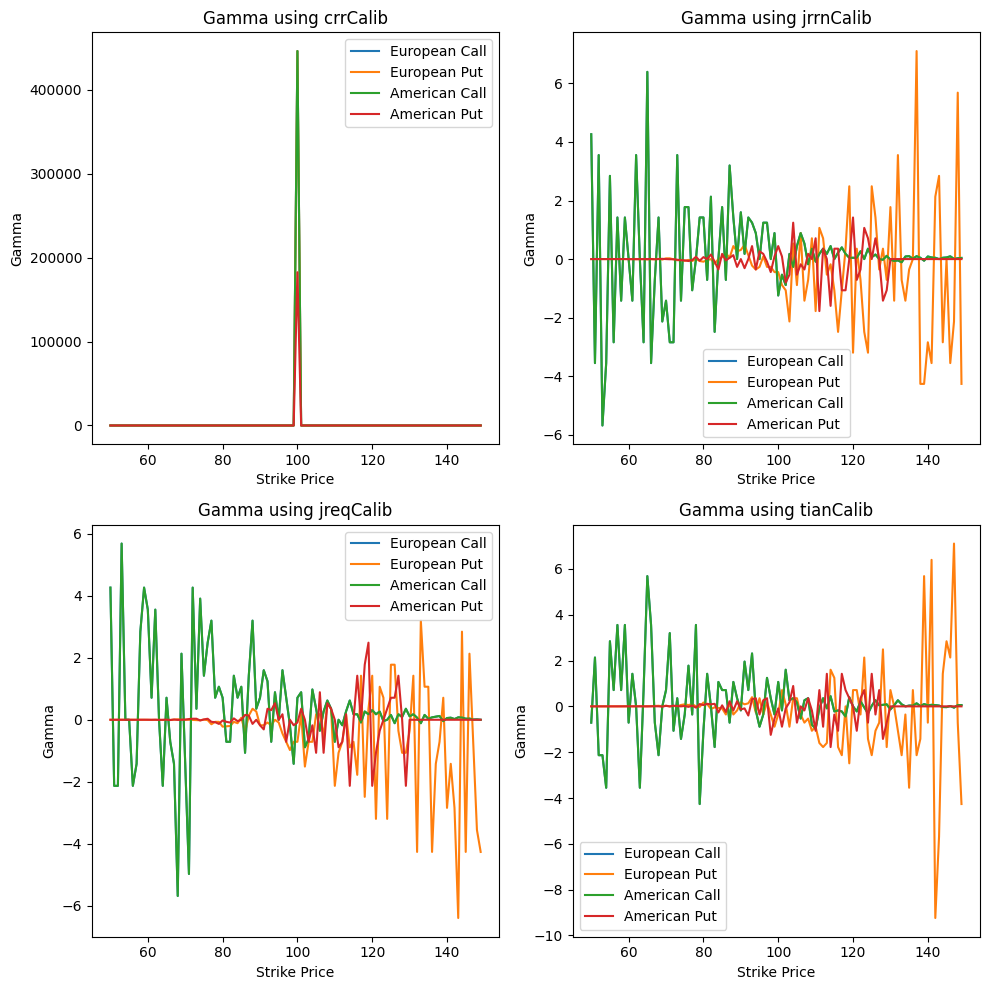

In [8]:
# Define parameters
S = 100
r = 0.03
vol = 0.2
ks = range(50, 150)
T = 1
n = 300

# Define calibration methods
calib_methods = [crrCalib, jrrnCalib, jreqCalib, tianCalib]
calib_names = ["crrCalib", "jrrnCalib", "jreqCalib", "tianCalib"] 

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Loop over each calibration method
for i, calib in enumerate(calib_methods):
    # Reset for each calibration
    european_call = []
    european_put = []
    american_call = []
    american_put = []

    # Compute deltas
    for strike in ks:
        payoffType = PayoffType.Call
        optiontype = EuropeanOption
        european_call.append(binomialGreeks(S, r, vol, T, float(strike), "Gamma"))
        payoffType = PayoffType.Put
        optiontype = EuropeanOption
        european_put.append(binomialGreeks(S, r, vol, T, float(strike), "Gamma"))
        payoffType = PayoffType.Call
        optiontype = AmericanOption
        american_call.append(binomialGreeks(S, r, vol, T, float(strike), "Gamma"))
        payoffType = PayoffType.Put
        optiontype = AmericanOption
        american_put.append(binomialGreeks(S, r, vol, T, float(strike), "Gamma"))

    # Determine the subplot to use
    ax = axs[i // 2, i % 2]
    
    # Plotting for the current calibration method
    ax.plot(ks, european_call, label="European Call")
    ax.plot(ks, european_put, label="European Put")
    ax.plot(ks, american_call, label="American Call")
    ax.plot(ks, american_put, label="American Put")
    ax.set_title(f"Gamma using {calib_names[i]}")
    ax.set_xlabel("Strike Price")
    ax.set_ylabel("Gamma")
    ax.legend()

plt.tight_layout()
plt.show()

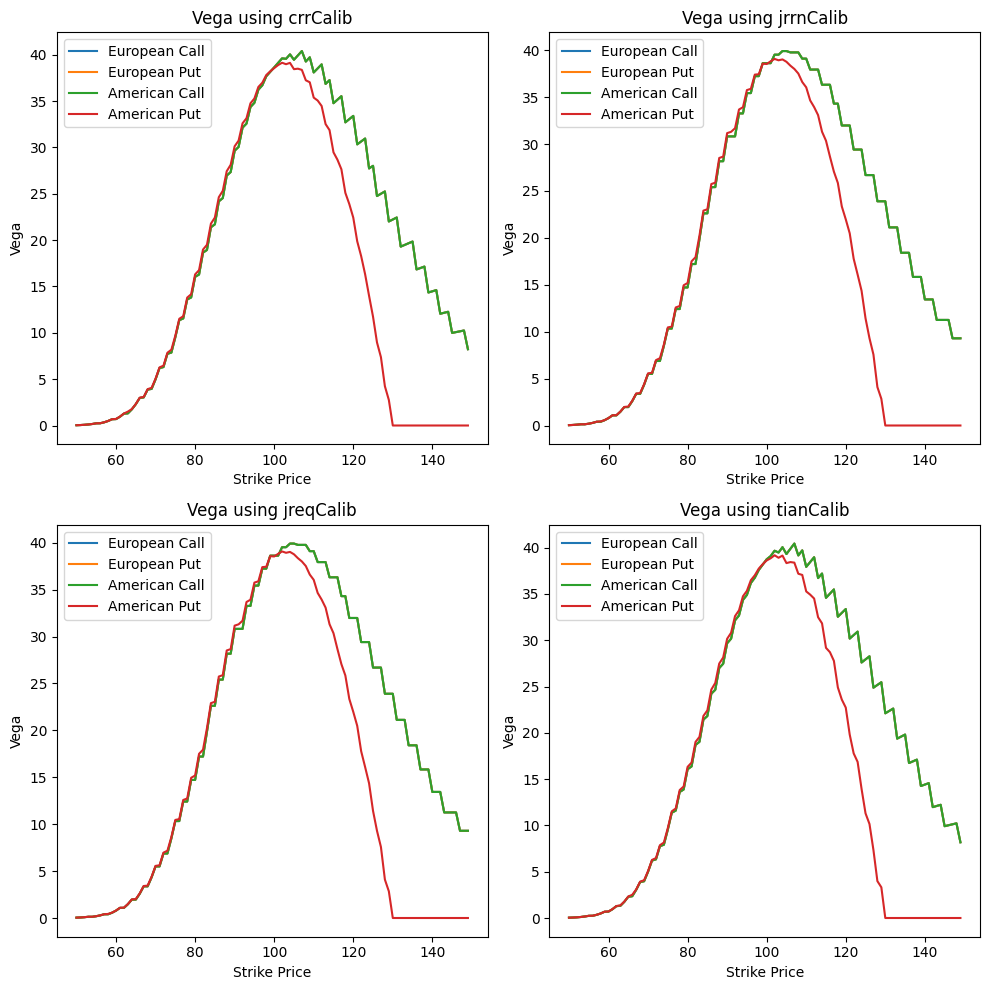

In [9]:
# Define parameters
S = 100
r = 0.03
vol = 0.2
ks = range(50, 150)
T = 1
n = 300

# Define calibration methods
calib_methods = [crrCalib, jrrnCalib, jreqCalib, tianCalib]
calib_names = ["crrCalib", "jrrnCalib", "jreqCalib", "tianCalib"] 

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Loop over each calibration method
for i, calib in enumerate(calib_methods):
    # Reset for each calibration
    european_call = []
    european_put = []
    american_call = []
    american_put = []

    # Compute deltas
    for strike in ks:
        payoffType = PayoffType.Call
        optiontype = EuropeanOption
        european_call.append(binomialGreeks(S, r, vol, T, float(strike), "Vega"))
        payoffType = PayoffType.Put
        optiontype = EuropeanOption
        european_put.append(binomialGreeks(S, r, vol, T, float(strike), "Vega"))
        payoffType = PayoffType.Call
        optiontype = AmericanOption
        american_call.append(binomialGreeks(S, r, vol, T, float(strike), "Vega"))
        payoffType = PayoffType.Put
        optiontype = AmericanOption
        american_put.append(binomialGreeks(S, r, vol, T, float(strike), "Vega"))

    # Determine the subplot to use
    ax = axs[i // 2, i % 2]
    
    # Plotting for the current calibration method
    ax.plot(ks, european_call, label="European Call")
    ax.plot(ks, european_put, label="European Put")
    ax.plot(ks, american_call, label="American Call")
    ax.plot(ks, american_put, label="American Put")
    ax.set_title(f"Vega using {calib_names[i]}")
    ax.set_xlabel("Strike Price")
    ax.set_ylabel("Vega")
    ax.legend()

plt.tight_layout()
plt.show()

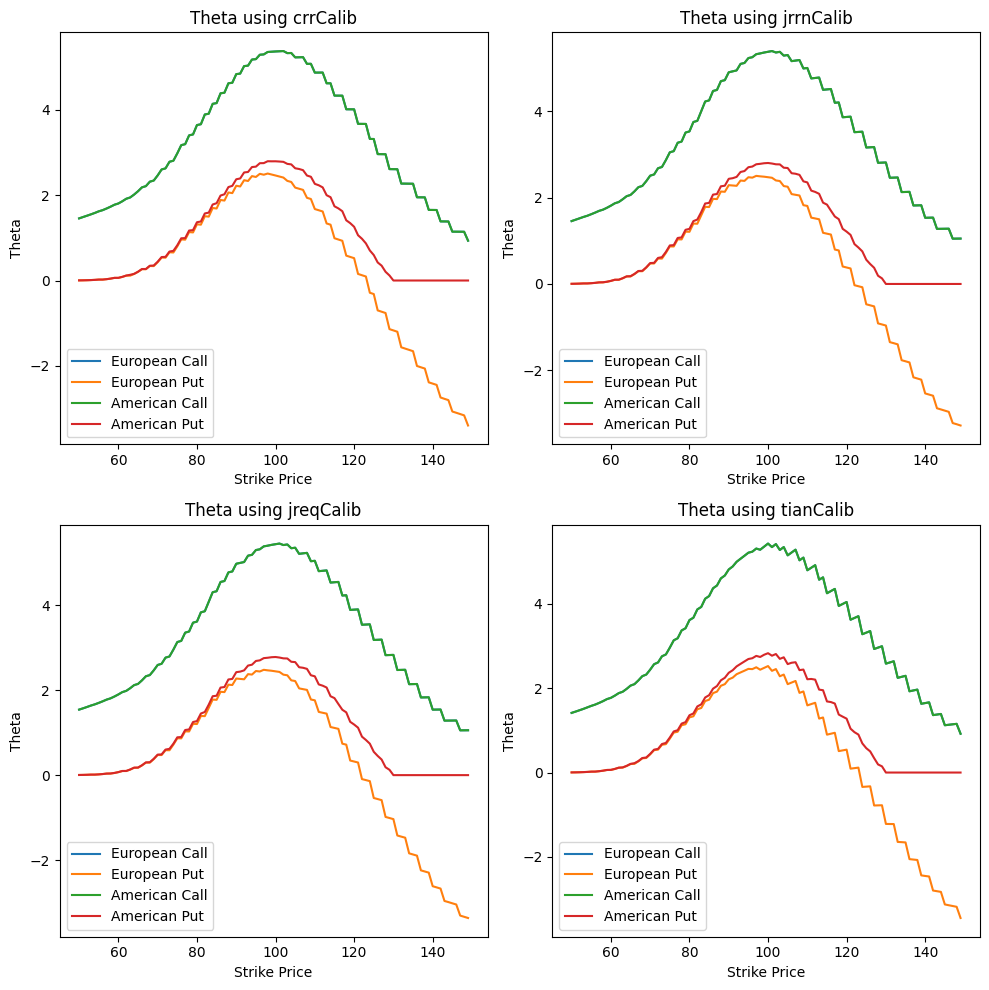

In [10]:
# Define parameters
S = 100
r = 0.03
vol = 0.2
ks = range(50, 150)
T = 1
n = 300

# Define calibration methods
calib_methods = [crrCalib, jrrnCalib, jreqCalib, tianCalib]
calib_names = ["crrCalib", "jrrnCalib", "jreqCalib", "tianCalib"] 

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Loop over each calibration method
for i, calib in enumerate(calib_methods):
    # Reset for each calibration
    european_call = []
    european_put = []
    american_call = []
    american_put = []

    # Compute deltas
    for strike in ks:
        payoffType = PayoffType.Call
        optiontype = EuropeanOption
        european_call.append(binomialGreeks(S, r, vol, T, float(strike), "Theta"))
        payoffType = PayoffType.Put
        optiontype = EuropeanOption
        european_put.append(binomialGreeks(S, r, vol, T, float(strike), "Theta"))
        payoffType = PayoffType.Call
        optiontype = AmericanOption
        american_call.append(binomialGreeks(S, r, vol, T, float(strike), "Theta"))
        payoffType = PayoffType.Put
        optiontype = AmericanOption
        american_put.append(binomialGreeks(S, r, vol, T, float(strike), "Theta"))

    # Determine the subplot to use
    ax = axs[i // 2, i % 2]
    
    # Plotting for the current calibration method
    ax.plot(ks, european_call, label="European Call")
    ax.plot(ks, european_put, label="European Put")
    ax.plot(ks, american_call, label="American Call")
    ax.plot(ks, american_put, label="American Put")
    ax.set_title(f"Theta using {calib_names[i]}")
    ax.set_xlabel("Strike Price")
    ax.set_ylabel("Theta")
    ax.legend()

plt.tight_layout()
plt.show()

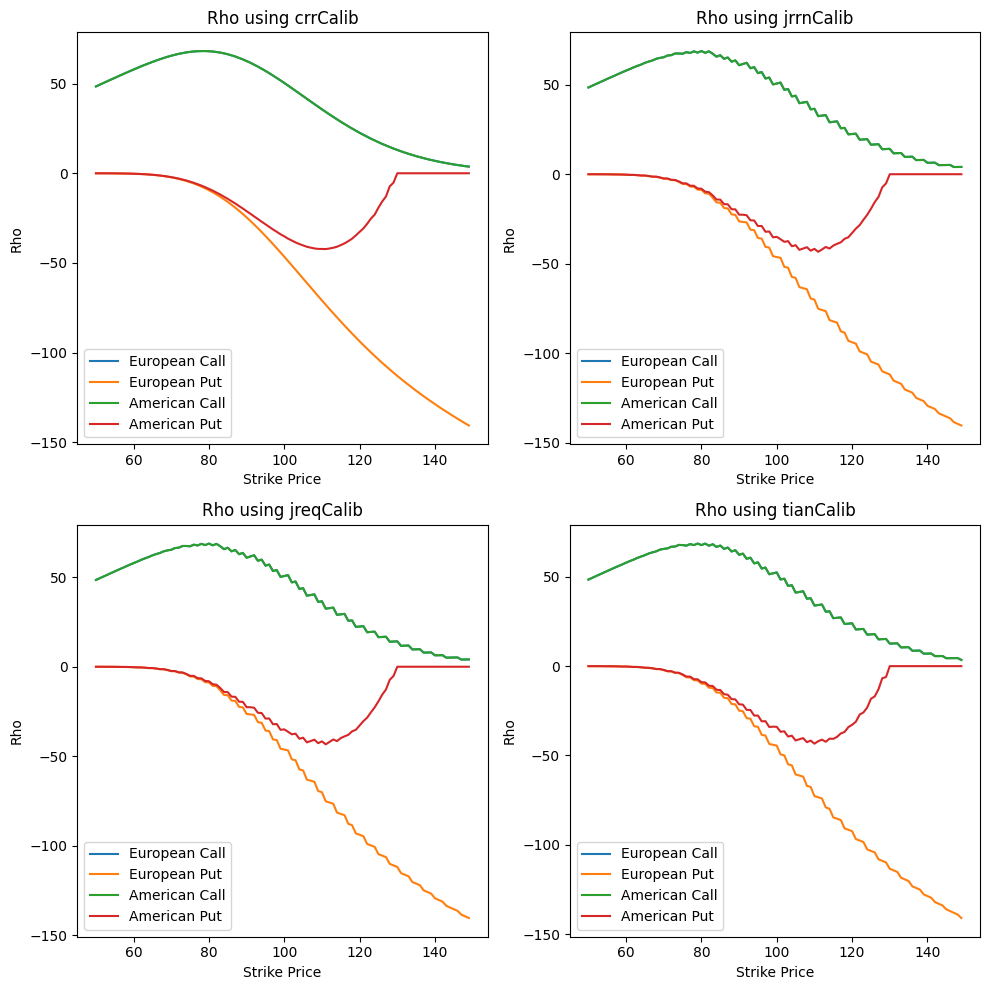

In [11]:
# Define parameters
S = 100
r = 0.03
vol = 0.2
ks = range(50, 150)
T = 1
n = 300

# Define calibration methods
calib_methods = [crrCalib, jrrnCalib, jreqCalib, tianCalib]
calib_names = ["crrCalib", "jrrnCalib", "jreqCalib", "tianCalib"]  

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Loop over each calibration method
for i, calib in enumerate(calib_methods):
    # Reset for each calibration
    european_call = []
    european_put = []
    american_call = []
    american_put = []

    # Compute deltas
    for strike in ks:
        payoffType = PayoffType.Call
        optiontype = EuropeanOption
        european_call.append(binomialGreeks(S, r, vol, T, float(strike), "Rho"))
        payoffType = PayoffType.Put
        optiontype = EuropeanOption
        european_put.append(binomialGreeks(S, r, vol, T, float(strike), "Rho"))
        payoffType = PayoffType.Call
        optiontype = AmericanOption
        american_call.append(binomialGreeks(S, r, vol, T, float(strike), "Rho"))
        payoffType = PayoffType.Put
        optiontype = AmericanOption
        american_put.append(binomialGreeks(S, r, vol, T, float(strike), "Rho"))

    # Determine the subplot to use
    ax = axs[i // 2, i % 2]
    
    # Plotting for the current calibration method
    ax.plot(ks, european_call, label="European Call")
    ax.plot(ks, european_put, label="European Put")
    ax.plot(ks, american_call, label="American Call")
    ax.plot(ks, american_put, label="American Put")
    ax.set_title(f"Rho using {calib_names[i]}")
    ax.set_xlabel("Strike Price")
    ax.set_ylabel("Rho")
    ax.legend()

plt.tight_layout()
plt.show()